In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def calc_treasure(mult, hunt, perc):
    return mult * 10000 / (hunt + perc)

In [3]:
mult = np.array(
    [[80, 50, 83, 31, 60],
    [89, 10, 37, 70, 90],
    [17, 40, 73, 100, 20],
    [41, 79, 23, 47, 30]]
)
hunt = np.array(
    [[6, 4, 7, 2, 4],
    [8, 1, 3, 4, 10],
    [1, 3, 4, 15, 2],
    [3, 5, 2, 3, 2]]
)

# Naive: Uniform participant percentages

In [4]:
perc_naive = np.ones(mult.shape) * 100 / np.size(mult)
perc_naive

array([[5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.]])

In [5]:
treasures = []
for m, h, p in zip(mult.flatten(), hunt.flatten(), perc_naive.flatten()):
    treasure = calc_treasure(m, h, p)
    treasures.append(treasure)

In [6]:
df = pd.DataFrame(data=np.array([mult.flatten(), hunt.flatten(), perc_naive.flatten(), treasures]).T, columns=['mult', 'hunt', 'perc_naive', 'tre_naive'])

In [7]:
df_sorted = df.sort_values(by='tre_naive', ascending=False).reset_index(drop=True)

In [8]:
df_sorted

,mult,hunt,perc_naive,tre_naive
0,73.0,4.0,5.0,81111.111111
1,79.0,5.0,5.0,79000.000000
2,70.0,4.0,5.0,77777.777778
3,80.0,6.0,5.0,72727.272727
4,83.0,7.0,5.0,69166.666667
5,89.0,8.0,5.0,68461.538462
6,60.0,4.0,5.0,66666.666667
7,90.0,10.0,5.0,60000.000000
8,47.0,3.0,5.0,58750.000000
9,50.0,4.0,5.0,55555.555556


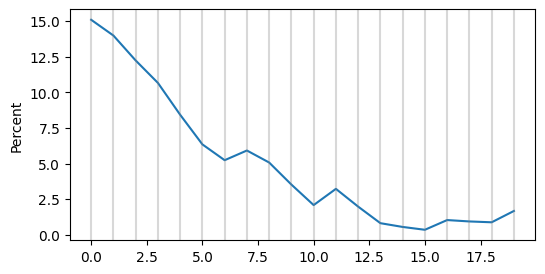

In [20]:
perc = np.linspace(1, 0.1, 20)** 3
perc = perc / perc.sum() * 100
perc += np.random.randint(0, 3, 20)
perc = perc / perc.sum() * 100

plt.figure(figsize=(6, 3))
plt.plot(perc)
plt.ylabel('Percent')
for i in range(20):
    plt.axvline(i, c='gray', alpha=0.3)
plt.show()

In [21]:
df_sorted = df_sorted.assign(perc=perc)

In [22]:
df_sorted = df_sorted.assign(tre=lambda x: calc_treasure(x['mult'], x['hunt'], x['perc']))

In [23]:
df_final = df_sorted.sort_values(by='tre', ascending=False)
df_final

,mult,hunt,perc_naive,tre_naive,perc,tre
15,30.0,2.0,5.0,42857.142857,0.346260,127863.046045
14,31.0,2.0,5.0,44285.714286,0.545575,121779.939270
13,37.0,3.0,5.0,46250.000000,0.809624,97122.448088
18,17.0,1.0,5.0,28333.333333,0.872133,90805.520136
10,41.0,3.0,5.0,51250.000000,2.081204,80689.530460
12,40.0,3.0,5.0,50000.000000,1.973956,80418.889002
16,23.0,2.0,5.0,32857.142857,1.029022,75932.089613
17,20.0,2.0,5.0,28571.428571,0.931866,68215.952610
9,50.0,4.0,5.0,55555.555556,3.521666,66474.631394
6,60.0,4.0,5.0,66666.666667,5.235178,64968.968455


In [24]:
print(f'Selected: {int(df_final.iloc[0]['mult'])}, {int(df_final.iloc[1]['mult'])}, {int(df_final.iloc[2]['mult'])}')
print(f'Profit: {int(df_final.iloc[0]['tre'])}, {int(df_final.iloc[1]['tre']) - 50000}, {int(df_final.iloc[2]['tre']) - 100000}')

Selected: 30, 31, 37
Profit: 127863, 71779, -2878


# Naive: Round 2 percentage profile

In [73]:
perc_naive = np.ones(mult.shape) * 100 / np.size(mult)
treasures = []
for m, h, p in zip(mult.flatten(), hunt.flatten(), perc_naive.flatten()):
    treasure = calc_treasure(m, h, p)
    treasures.append(treasure)

df = pd.DataFrame(data=np.array([mult.flatten(), hunt.flatten(), perc_naive.flatten(), treasures]).T, columns=['mult', 'hunt', 'perc_naive', 'tre_naive'])
df_sorted = df.sort_values(by='tre_naive', ascending=False).reset_index(drop=True)

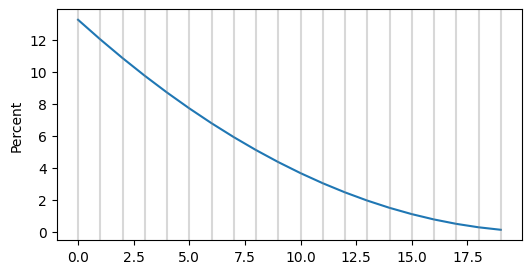

In [77]:
perc = np.linspace(1, 0.1, 20) ** 2
perc = perc / perc.sum() * 100
# perc += np.random.randint(0, 3, 20)
perc = perc / perc.sum() * 100

plt.figure(figsize=(6, 3))
plt.plot(perc)
plt.ylabel('Percent')
for i in range(20):
    plt.axvline(i, c='gray', alpha=0.3)
plt.show()

In [78]:
perc_naive = perc
treasures = []
for m, h, p in zip(mult.flatten(), hunt.flatten(), perc_naive.flatten()):
    treasure = calc_treasure(m, h, p)
    treasures.append(treasure)
df_sorted['perc_naive'] = perc_naive
df_sorted['tre_naive'] = treasures

In [79]:
df_sorted = df_sorted.sort_values(by='tre_naive', ascending=False).reset_index(drop=True)

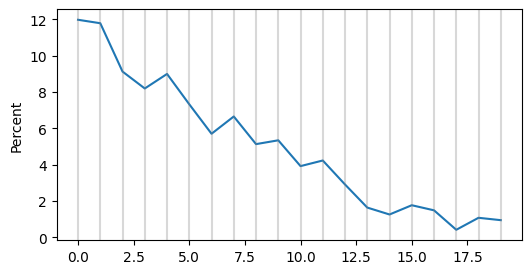

In [150]:
perc = np.linspace(1, 0.1, 20) ** 2
perc = perc / perc.sum() * 100
perc += np.random.randint(0, 3, 20)
perc = perc / perc.sum() * 100

plt.figure(figsize=(6, 3))
plt.plot(perc)
plt.ylabel('Percent')
for i in range(20):
    plt.axvline(i, c='gray', alpha=0.3)
plt.show()

In [151]:
df_sorted = df_sorted.assign(perc=perc)
df_sorted = df_sorted.assign(tre=lambda x: calc_treasure(x['mult'], x['hunt'], x['perc']))
df_final = df_sorted.sort_values(by='tre', ascending=False)
df_final[df_final['tre'] > 100000]

,mult,hunt,perc_naive,tre_naive,perc,tre
17,79.0,5.0,12.032541,31186.571917,0.422529,145688.474031
14,73.0,4.0,13.258897,41539.241974,1.264192,138672.741500
13,70.0,4.0,10.865685,46457.776983,1.644746,124009.112118
19,60.0,4.0,6.793257,12831.606083,0.951755,121169.150458
18,80.0,6.0,9.758328,26364.292318,1.082310,112957.487975


In [154]:
profitable = []
for _ in range(10000):
    perc = np.linspace(1, 0.1, 20) ** 1
    perc = perc / perc.sum() * 100
    perc += np.random.randint(0, 3, 20)
    perc = perc / perc.sum() * 100

    df_sorted = df_sorted.assign(perc=perc)
    df_sorted = df_sorted.assign(tre=lambda x: calc_treasure(x['mult'], x['hunt'], x['perc']))
    df_final = df_sorted.sort_values(by='tre', ascending=False)
    profitable.extend(list(df_final[df_final['tre'] > 100000]['mult']))
np.unique(profitable, return_counts=True)

(array([60., 70., 73., 79., 80.]), array([6613, 2549, 3840, 6566, 6190]))

-> 60, 79

In [155]:
profitable = []
for _ in range(10000):
    perc = np.linspace(1, 0.1, 20) ** 1.5
    perc = perc / perc.sum() * 100
    perc += np.random.randint(0, 3, 20)
    perc = perc / perc.sum() * 100

    df_sorted = df_sorted.assign(perc=perc)
    df_sorted = df_sorted.assign(tre=lambda x: calc_treasure(x['mult'], x['hunt'], x['perc']))
    df_final = df_sorted.sort_values(by='tre', ascending=False)
    profitable.extend(list(df_final[df_final['tre'] > 100000]['mult']))
np.unique(profitable, return_counts=True)

(array([41., 60., 70., 73., 79., 80.]),
 array([  757,  9461,  4130,  6890, 10000,  6688]))

-> 60, 79

In [156]:
profitable = []
for _ in range(10000):
    perc = np.linspace(1, 0.1, 20) ** 2
    perc = perc / perc.sum() * 100
    perc += np.random.randint(0, 3, 20)
    perc = perc / perc.sum() * 100

    df_sorted = df_sorted.assign(perc=perc)
    df_sorted = df_sorted.assign(tre=lambda x: calc_treasure(x['mult'], x['hunt'], x['perc']))
    df_final = df_sorted.sort_values(by='tre', ascending=False)
    profitable.extend(list(df_final[df_final['tre'] > 100000]['mult']))
np.unique(profitable, return_counts=True)

(array([41., 60., 70., 73., 79., 80.]),
 array([ 3376, 10000,  6655, 10000, 10000,  9902]))

-> 60, 73, 79